  family  father  mother  midparentHeight  children  childNum  gender  \
0      1    78.5    67.0            75.43         4         1    male   
1      1    78.5    67.0            75.43         4         2  female   
2      1    78.5    67.0            75.43         4         3  female   
3      1    78.5    67.0            75.43         4         4  female   
4      2    75.5    66.5            73.66         4         1    male   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  


c:\Users\cheei\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Sequential MSE (train): 0.8379715966485575
Sequential MSE (test): 0.9527149781351922
Functional MSE (train): 0.8524437105632261
Functional MSE (test): 0.9140727377031272


C:\Users\cheei\AppData\Local\Temp\ipykernel_29824\4222125993.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


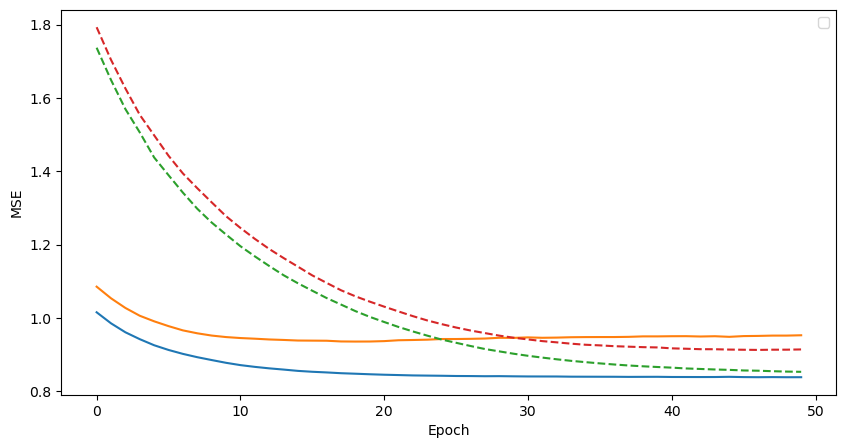

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
새로운 아버지 키 [70 72 74] → 예측 아들 키 [70.02909 70.5308  71.0325 ]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense

# 데이터 불러오기
url = "https://raw.githubusercontent.com/data-8/materials-fa17/refs/heads/master/lec/galton.csv"
df = pd.read_csv(url)
print(df.head())

# 아들 데이터만 선택
df_son = df[df['gender'] == 'male']

# 입력(x)와 정답(y) 데이터 정하기
x = df_son[['father']].values   # 아버지 키 데이터
y = df_son[['childHeight']].values  # 아들 키 데이터

# 훈련용(train)데이터와 테스트(test)데이터 두개로 나누기
# 데이터를 훈련용과 테스트용으로 나누기 (7:3 비율)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)
# 

# 데이터 스케일링 준비
# 키 데이터의 단위가 인치이고 숫자의 범위가 제각각인데 이를 모델이 더 잘 학습하게 평균은 0, 표주편차는 1인 값으로 표준화 작업 
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 훈련용 데이터에 맞춰 스케일링하고 적용
# 훈련 데이터의 평균과 표준편차를 계산(fit)하고 그 기준으로 데이터를 변환(transform)하는 작업
x_train_s = scaler_x.fit_transform(x_train)
x_test_s = scaler_x.transform(x_test)

# 테스트용 데이터는 훈련용 데이터 기준으로 스케일링 적용
y_train_s = scaler_y.fit_transform(y_train)
y_test_s = scaler_y.transform(y_test)

# 인공지능 모델 만들기

# Sequential API
model = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),  # 입력층 & 은닉층
    Dense(1)    # 출력층
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history_seq = model.fit(x_train_s, y_train_s,
                            validation_data=(x_test_s, y_test_s),
                            epochs=50, verbose=0)

inputs = Input(shape=(1,))
x = Dense(8, activation='relu')(inputs)
outputs = Dense(1)(x)
func_model = Model(inputs, outputs)
func_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history_func = func_model.fit(x_train_s, y_train_s,
                            validation_data=(x_test_s, y_test_s),
                            epochs=50, verbose=0)

y_train_pred_seq = model.predict(x_train_s)
y_test_pred_seq = model.predict(x_test_s)
mse_train_seq = mean_squared_error(y_train_s, y_train_pred_seq)
mse_test_seq = mean_squared_error(y_test_s, y_test_pred_seq)

y_train_pred_func = func_model.predict(x_train_s)
y_test_pred_func = func_model.predict(x_test_s)
mse_train_func = mean_squared_error(y_train_s, y_train_pred_func)
mse_test_func = mean_squared_error(y_test_s, y_test_pred_func)

print("Sequential MSE (train):", mse_train_seq)
print("Sequential MSE (test):", mse_test_seq)
print("Functional MSE (train):", mse_train_func)
print("Functional MSE (test):", mse_test_func)

plt.figure(figsize=(10,5))
plt.plot(history_seq.history['loss'])
plt.plot(history_seq.history['val_loss'])
plt.plot(history_func.history['loss'], linestyle='--')
plt.plot(history_func.history['val_loss'], linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

new_father_height = np.array([[70],[72],[74]])  # inch
new_father_height_s = scaler_x.transform(new_father_height)
pred_son_height_s = model.predict(new_father_height_s)
pred_son_height = scaler_y.inverse_transform(pred_son_height_s)

print("새로운 아버지 키", new_father_height.ravel(), "→ 예측 아들 키", pred_son_height.ravel())
